In [1]:
#importing required libraries
import numpy as np
from sympy import *
import sympy
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
import SGD as stochasticGD
import contourPlot as cp

In [3]:
#importing loss function that need to be optimised
import lossFunction as myFunc


--> Generating training data points

In [4]:
training_data = myFunc.generate_trainingdata()

--> Ploting the training data

In [5]:
# Define the x and y ranges as 1D arrays
x = np.linspace(-20, 10, 100)
y = np.linspace(-20, 10, 100)
z = []
for i in x:
    zz = []
    for j in y: 
        zz.append(myFunc.f([i, j], training_data))
    z.append(zz)
z = np.array(z)

# Use meshgrid to create 2D coordinate arrays
x, y = np.meshgrid(x, y)

# Enable the interactive backend
%matplotlib widget

# Contour plot
fig1, ax1 = plt.subplots(subplot_kw=dict(projection='3d'))
ax1.contour3D(x, y, z, 90)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax1.set_zlabel('$f(x, training-data)$')
ax1.set_title('Contour plot of $f(x, trainingData)$')

# Wireframe plot
fig2, ax2 = plt.subplots(subplot_kw=dict(projection='3d'))
ax2.plot_wireframe(x, y, z, rstride=5, cstride=5)
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')
ax2.set_zlabel('$f(x, training-data)$')
ax2.set_title('Wireframe plot of $f(x, trainingData)$')

plt.show()

-> Derivative of the given function

In [6]:
x0, x1, w0, w1 = sympy.symbols('x0,x1,w0,w1', real=True)
f = sympy.Min(44*((x0-w0-1)**2+(x1-w1-1)**2), ((x0-w0-1)+10)**2+((x1-w1-1)+2)**2)  
df0 = sympy.diff(f, x0)
df1 = sympy.diff(f, x1)
print(f"Function (f): \n{f}\n")
print(f"Derivative of f wrt x0: \n{df0}\n")
print(f"Derivative of f wrt x1: \n{df1}\n")

Function (f): 
Min(44*(-w0 + x0 - 1)**2 + 44*(-w1 + x1 - 1)**2, (-w0 + x0 + 9)**2 + (-w1 + x1 + 1)**2)

Derivative of f wrt x0: 
(-88*w0 + 88*x0 - 88)*Heaviside(-44*(-w0 + x0 - 1)**2 + (-w0 + x0 + 9)**2 - 44*(-w1 + x1 - 1)**2 + (-w1 + x1 + 1)**2) + (-2*w0 + 2*x0 + 18)*Heaviside(44*(-w0 + x0 - 1)**2 - (-w0 + x0 + 9)**2 + 44*(-w1 + x1 - 1)**2 - (-w1 + x1 + 1)**2)

Derivative of f wrt x1: 
(-88*w1 + 88*x1 - 88)*Heaviside(-44*(-w0 + x0 - 1)**2 + (-w0 + x0 + 9)**2 - 44*(-w1 + x1 - 1)**2 + (-w1 + x1 + 1)**2) + (-2*w1 + 2*x1 + 2)*Heaviside(44*(-w0 + x0 - 1)**2 - (-w0 + x0 + 9)**2 + 44*(-w1 + x1 - 1)**2 - (-w1 + x1 + 1)**2)



In [7]:
df0 = lambda x0, x1, w0, w1:\
    (-88*w0 + 88*x0 - 88)*np.heaviside(-44*(-w0 + x0 - 1)**2 + (-w0 + x0 + 9)**2 - 44*(-w1 + x1 - 1)**2 + (-w1 + x1 + 1)**2, 0) + \
    (-2*w0 + 2*x0 + 18)*np.heaviside(44*(-w0 + x0 - 1)**2 - (-w0 + x0 + 9)**2 + 44*(-w1 + x1 - 1)**2 - (-w1 + x1 + 1)**2, 0)

df1 = lambda x0, x1, w0, w1:\
    (-88*w1 + 88*x1 - 88)*np.heaviside(-44*(-w0 + x0 - 1)**2 + (-w0 + x0 + 9)**2 - 44*(-w1 + x1 - 1)**2 + (-w1 + x1 + 1)**2, 0) + \
    (-2*w1 + 2*x1 + 2)*np.heaviside(44*(-w0 + x0 - 1)**2 - (-w0 + x0 + 9)**2 + 44*(-w1 + x1 - 1)**2 - (-w1 + x1 + 1)**2, 0)

--> Minimizing loss function using gradient descent with a contant step-size

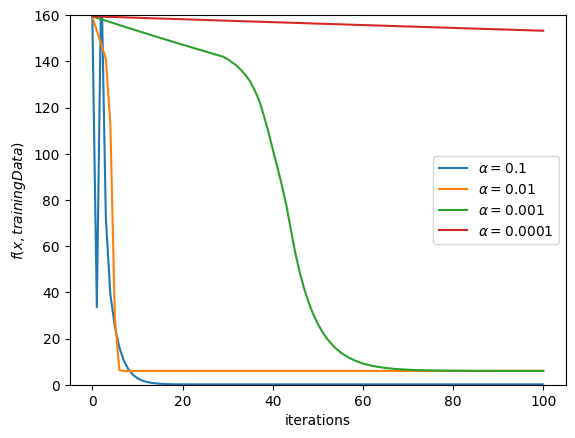

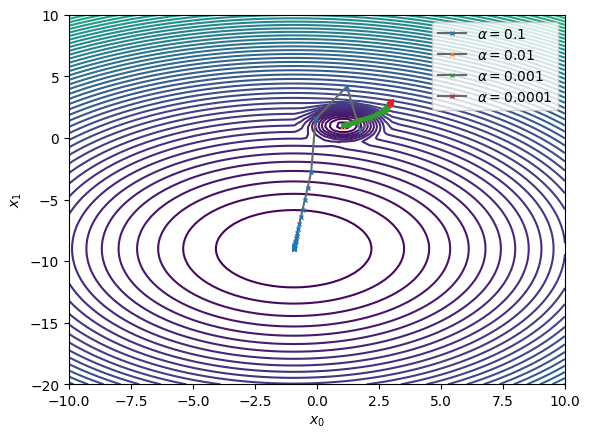

In [8]:
num_iters = 100
c = 0
iters = list(range(num_iters + 1))
alphas = [0.1, 0.01, 0.001, 0.0001]
labels = [f'$\\alpha={alpha}$' for alpha in alphas]
xs, fs = [], []
for i, alpha in enumerate(alphas):
    sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "constant", {'alpha': alpha},
        batch_size=len(training_data), trainingData=training_data)
    for _ in range(num_iters):
        sgd.minibatch_Iteration()
    plt.plot(iters, sgd.logs['f'], label=labels[i], color=cp.colors[c])
    c += 1
    xs.append(deepcopy(sgd.logs['x']))
    fs.append(deepcopy(sgd.logs['f']))
plt.ylim([0, 160])
plt.xlabel('iterations')
plt.ylabel('$f(x, trainingData)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

--> Minimizing the objective function using mini-batch SGD of size 5 with a constant step-size 

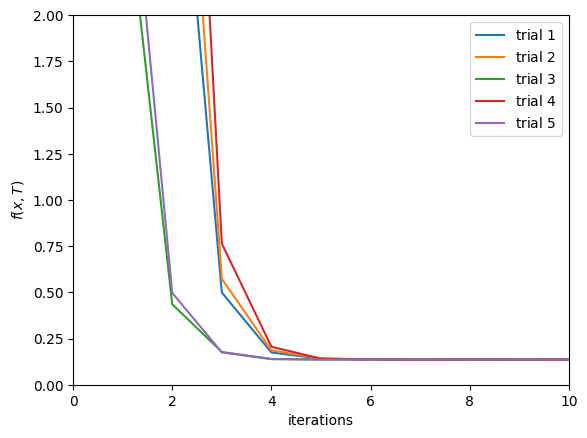

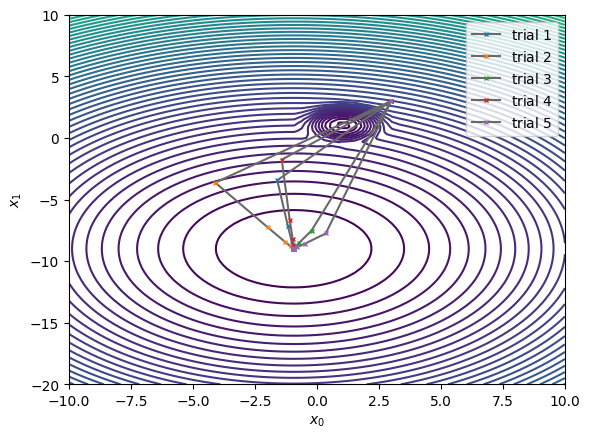

In [9]:
num_trials = 5
num_iters = 100
c = 0
iters = list(range(num_iters + 1))
alpha = 0.1
labels = [f'trial ${i+1}$' for i in range(num_trials)]
xs, fs = [], []
for trial in range(num_trials):
    sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "constant", {'alpha': alpha}, batch_size = 5, trainingData = training_data)
    for _ in range(num_iters):
        sgd.minibatch_Iteration()
    plt.plot(iters, sgd.logs['f'], label=labels[trial], color=cp.colors[c])
    c += 1
    xs.append(deepcopy(sgd.logs['x']))
    fs.append(deepcopy(sgd.logs['f']))
plt.ylim([0, 2])
plt.xlim([0, 10])
plt.xlabel('iterations')
plt.ylabel('$f(x, T)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

--> Minimizing loss function using mini-batch SGD, using fixed step size and varying mini-batch size

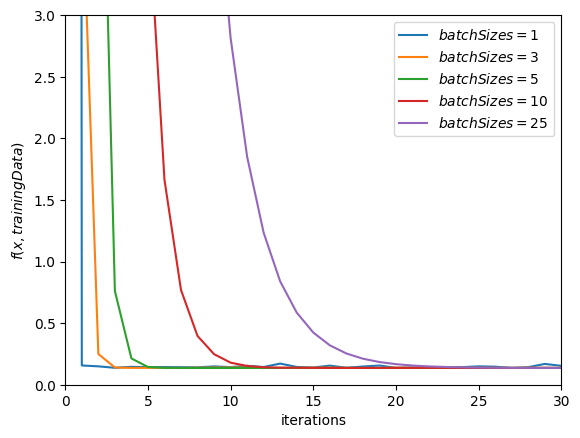

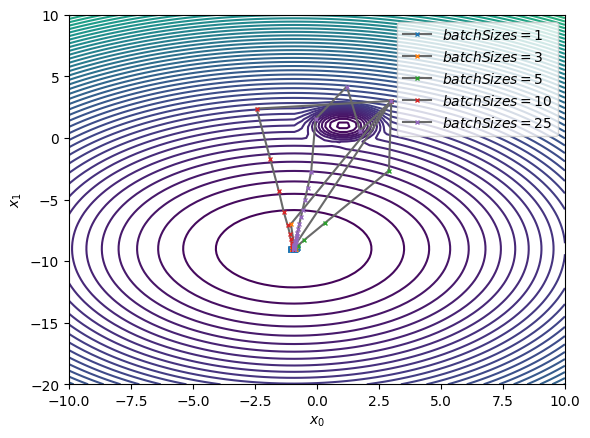

In [10]:
num_iters = 100
c = 0
iters = list(range(num_iters + 1))
alpha = 0.1
batch_sizes = [1, 3, 5, 10, 25]
labels = [f'$batchSizes={n}$' for n in batch_sizes]
xs, fs = [], []
for i, n in enumerate(batch_sizes):
    sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "constant", {'alpha': alpha}, batch_size = n, trainingData = training_data)
    for _ in range(num_iters):
        sgd.minibatch_Iteration()
    plt.plot(iters, sgd.logs['f'], label=labels[i], color=cp.colors[c])
    c += 1
    xs.append(deepcopy(sgd.logs['x']))
    fs.append(deepcopy(sgd.logs['f']))
plt.ylim([0, 3])
plt.xlim([0, 30])
plt.xlabel('iterations')
plt.ylabel('$f(x, trainingData)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

--> Minimizing loss function using mini-batch SGD, using fixed mini-batch size and varying step size

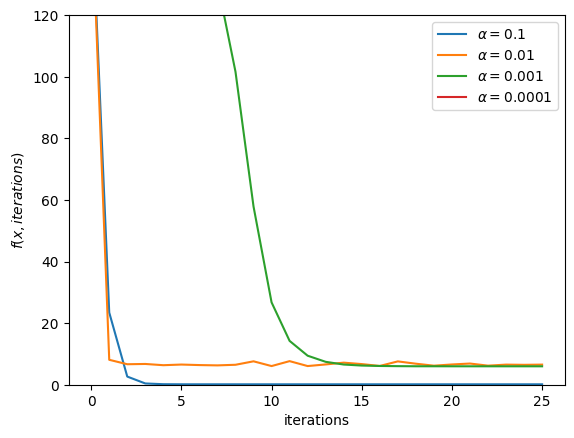

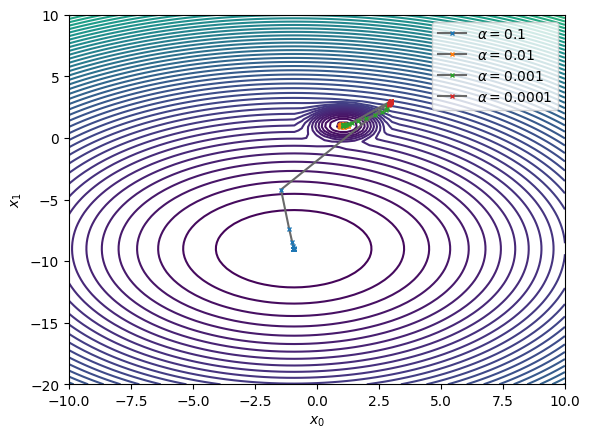

In [11]:
num_iters = 25
c = 0
iters = list(range(num_iters + 1))
alphas = [0.1, 0.01, 0.001, 0.0001]
labels = [f'$\\alpha={alpha}$' for alpha in alphas]
xs, fs = [], []
for i, alpha in enumerate(alphas):
    sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "constant", {'alpha': alpha}, batch_size = 5, trainingData = training_data)
    for _ in range(num_iters):
        sgd.minibatch_Iteration()
    plt.plot(iters, sgd.logs['f'], label=labels[i], color=cp.colors[c])
    c += 1
    xs.append(deepcopy(sgd.logs['x']))
    fs.append(deepcopy(sgd.logs['f']))
plt.ylim([0, 120])
plt.xlabel('iterations')
plt.ylabel('$f(x, iterations)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

--> Mini-batch SGD to minimise the loss function

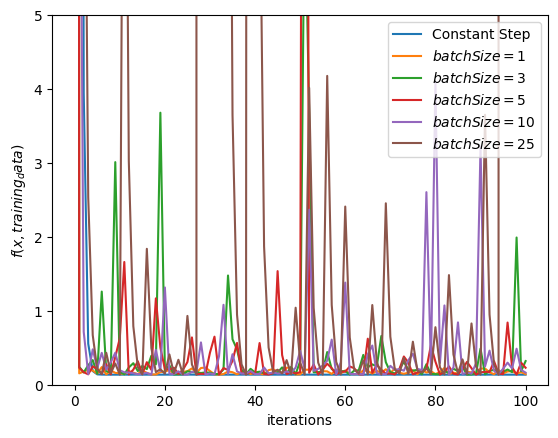

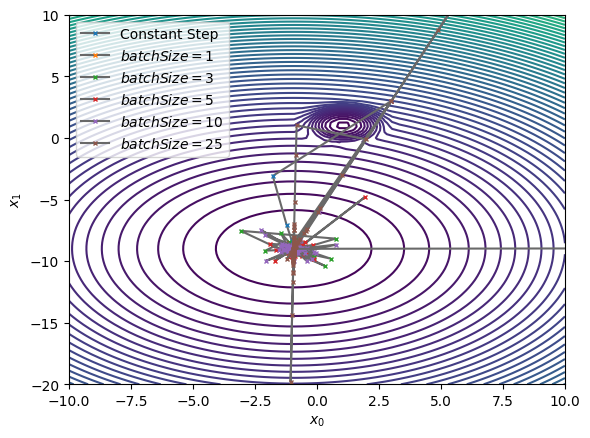

In [18]:
num_iters = 100
iters = list(range(num_iters + 1))
c = 0
xs, fs = [], []
labels = ['Constant Step']

sgd_bl = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "constant", {'alpha': 0.1}, batch_size = 5, trainingData = training_data)
for _ in range(num_iters):
    sgd_bl.minibatch_Iteration()
plt.plot(iters, sgd_bl.logs['f'], label=labels[0], color=cp.colors[c])
c += 1
xs.append(deepcopy(sgd_bl.logs['x']))
fs.append(deepcopy(sgd_bl.logs['f']))

# polyak
batch_sizes = [1, 3, 5, 10, 25]
for n in batch_sizes:
    sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "polyak", {}, batch_size = n, trainingData = training_data)
    for _ in range(num_iters):
        sgd.minibatch_Iteration()
    labels.append(f'$batchSize={n}$')
    plt.plot(iters, sgd.logs['f'], label=labels[-1], color=cp.colors[c])
    c += 1
    xs.append(deepcopy(sgd.logs['x']))
    fs.append(deepcopy(sgd.logs['f']))

plt.ylim([0, 5])
plt.xlabel('iterations')
plt.ylabel('$f(x, training_data)$')
plt.legend()
plt.show()
# mini-batch variation
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

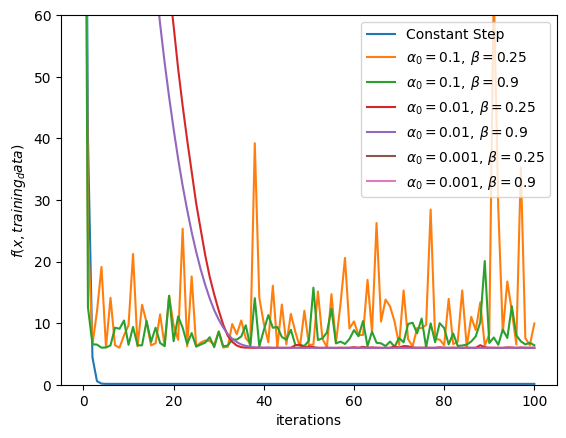

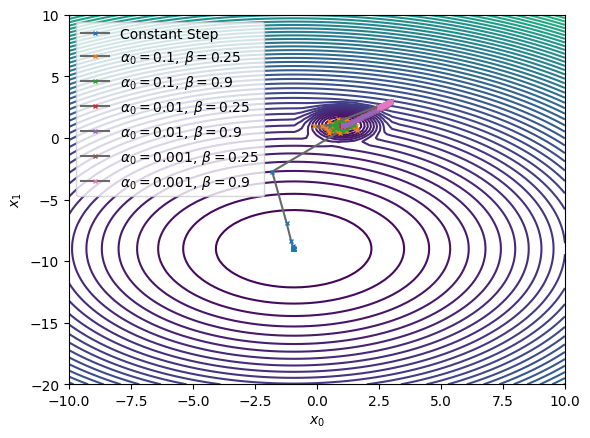

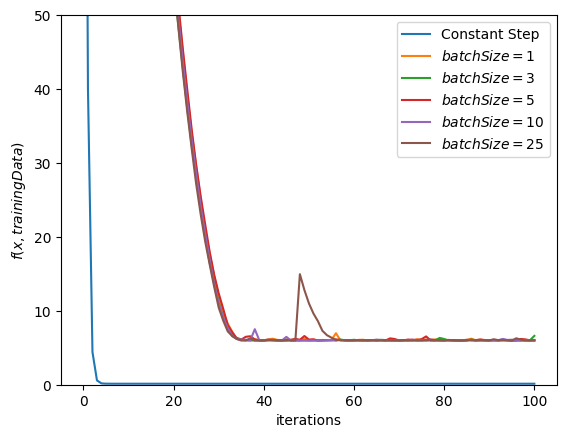

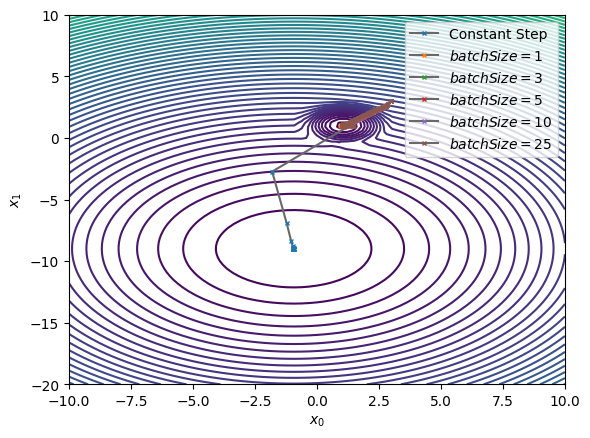

In [24]:
num_iters = 100
iters = list(range(num_iters + 1))
c = 0
xs, fs = [], []
labels = ['Constant Step']

sgd_bl = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "constant", {'alpha': 0.1}, 5, training_data)
for _ in range(num_iters):
    sgd_bl.minibatch_Iteration()
plt.plot(iters, sgd_bl.logs['f'], label=labels[0], color=cp.colors[c])
c += 1
xs.append(deepcopy(sgd_bl.logs['x']))
fs.append(deepcopy(sgd_bl.logs['f']))

alpha0s = [0.1, 0.01, 0.001]
betas = [0.25, 0.9]
for alpha0 in alpha0s:
    for beta in betas:
        sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "rmsprop",
            {'alpha0': alpha0, 'beta': beta}, 5, training_data)
        for _ in range(num_iters):
            sgd.minibatch_Iteration()
        labels.append(f'$\\alpha_0={alpha0},\\,\\beta={beta}$')
        plt.plot(iters, sgd.logs['f'], label=labels[-1], color=cp.colors[c])
        c += 1
        xs.append(deepcopy(sgd.logs['x']))
        fs.append(deepcopy(sgd.logs['f']))

plt.ylim([0, 60])
plt.xlabel('iterations')
plt.ylabel('$f(x, training_data)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

c = 0
xs, fs = [], []
labels = ['Constant Step']
plt.plot(iters, sgd_bl.logs['f'], label=labels[0], color=cp.colors[c])
c += 1
xs.append(deepcopy(sgd_bl.logs['x']))
fs.append(deepcopy(sgd_bl.logs['f']))
batch_sizes = [1, 3, 5, 10, 25]
for n in batch_sizes:
    sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "rmsprop", {'alpha0': 0.01, 'beta': 0.25}, 5, training_data)
    for _ in range(num_iters):
        sgd.minibatch_Iteration()
    labels.append(f'$batchSize={n}$')
    plt.plot(iters, sgd.logs['f'], label=labels[-1], color=cp.colors[c])
    c += 1
    xs.append(deepcopy(sgd.logs['x']))
    fs.append(deepcopy(sgd.logs['f']))

plt.ylim([0, 50])
plt.xlabel('iterations')
plt.ylabel('$f(x, trainingData)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

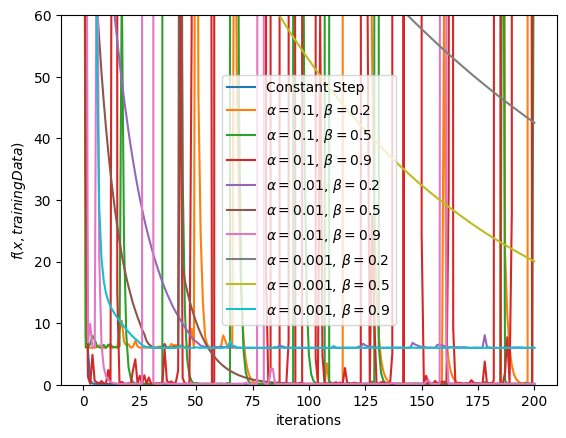

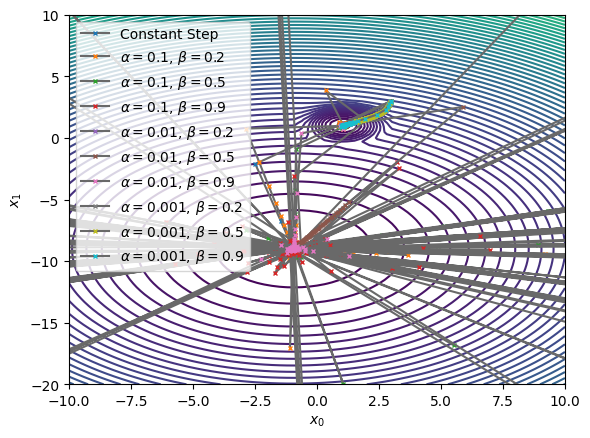

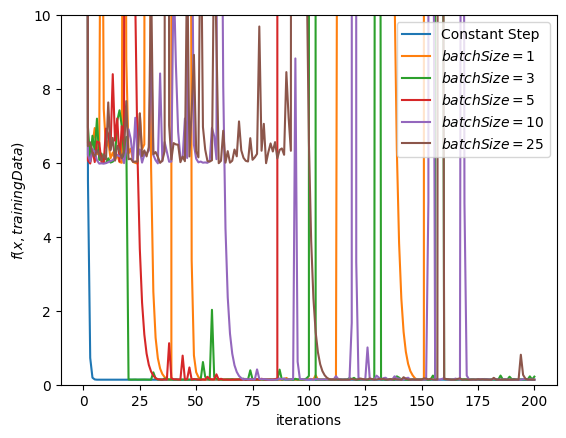

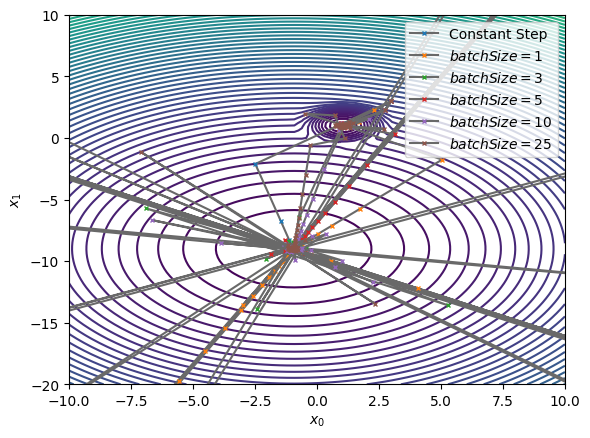

In [31]:
num_iters = 200
iters = list(range(num_iters + 1))

c = 0
xs, fs = [], []
labels = ['Constant Step']

sgd_bl = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "constant", {'alpha': 0.1}, 5, training_data)
for _ in range(num_iters):
    sgd_bl.minibatch_Iteration()
plt.plot(iters, sgd_bl.logs['f'], label=labels[0], color=cp.colors[c])
c += 1
xs.append(deepcopy(sgd_bl.logs['x']))
fs.append(deepcopy(sgd_bl.logs['f']))

alphas = [0.1, 0.01, 0.001]
betas = [0.2, 0.5, 0.9]
for alpha in alphas:
    for beta in betas:
        sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "heavyball",
            {'alpha': alpha, 'beta': beta}, 5, training_data)
        for _ in range(num_iters):
            sgd.minibatch_Iteration()
        labels.append(f'$\\alpha={alpha},\\,\\beta={beta}$')
        plt.plot(iters, sgd.logs['f'], label=labels[-1], color=cp.colors[c])
        c += 1
        xs.append(deepcopy(sgd.logs['x']))
        fs.append(deepcopy(sgd.logs['f']))

plt.ylim([0, 60])
plt.xlabel('iterations')
plt.ylabel('$f(x, trainingData)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

c = 0
xs, fs = [], []
labels = ['Constant Step']
plt.plot(iters, sgd_bl.logs['f'], label=labels[0], color=cp.colors[c])
c += 1
xs.append(deepcopy(sgd_bl.logs['x']))
fs.append(deepcopy(sgd_bl.logs['f']))
batch_sizes = [1, 3, 5, 10, 25]
for n in batch_sizes:
    sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "heavyball",
        {'alpha': 0.01, 'beta': 0.9}, 5, training_data)
    for _ in range(num_iters):
        sgd.minibatch_Iteration()
    labels.append(f'$batchSize={n}$')
    plt.plot(iters, sgd.logs['f'], label=labels[-1], color=cp.colors[c])
    c += 1
    xs.append(deepcopy(sgd.logs['x']))
    fs.append(deepcopy(sgd.logs['f']))
plt.ylim([0, 10])
plt.xlabel('iterations')
plt.ylabel('$f(x, trainingData)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

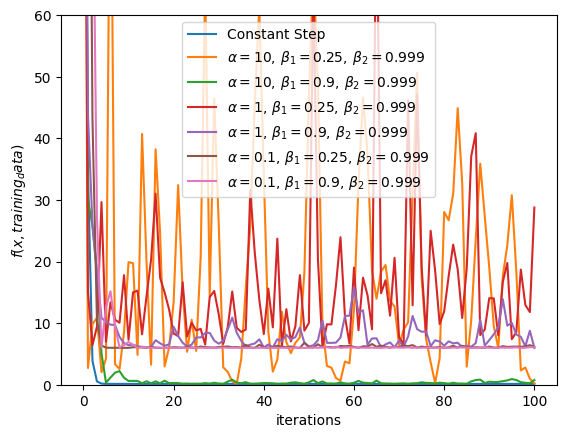

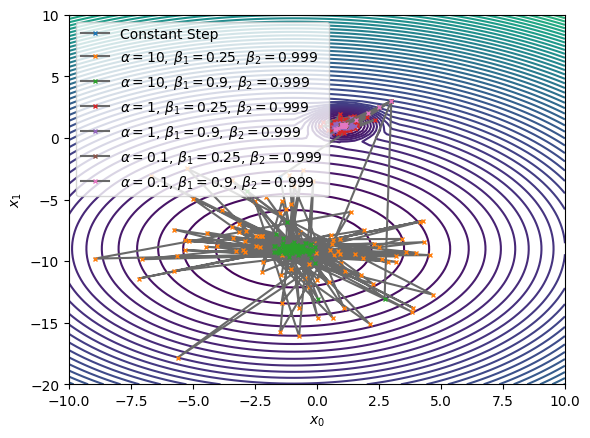

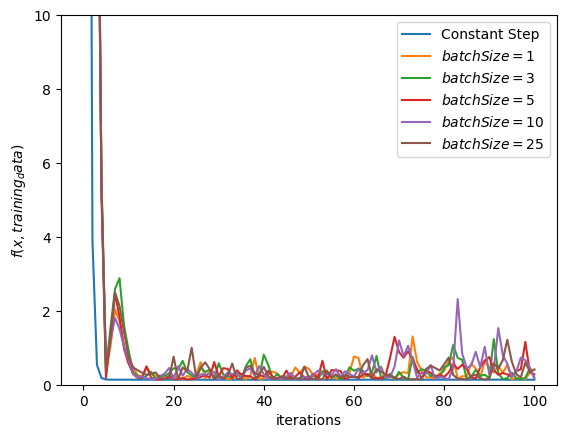

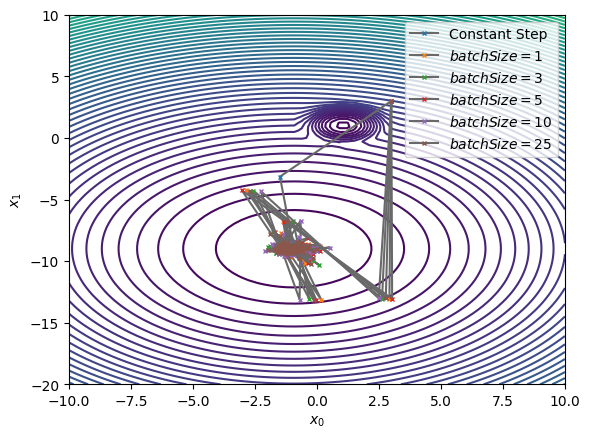

In [32]:
num_iters = 100
iters = list(range(num_iters + 1))

c = 0
xs, fs = [], []
labels = ['Constant Step']

sgd_bl = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "constant", {'alpha': 0.1}, 5, training_data)
for _ in range(num_iters):
    sgd_bl.minibatch_Iteration()
plt.plot(iters, sgd_bl.logs['f'], label=labels[0], color=cp.colors[c])
c += 1
xs.append(deepcopy(sgd_bl.logs['x']))
fs.append(deepcopy(sgd_bl.logs['f']))

alphas = [10, 1, 0.1]
beta1s = [0.25, 0.9]
beta2s = [0.999]
for alpha in alphas:
    for beta1 in beta1s:
        for beta2 in beta2s:
            sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "adam",
                {'alpha': alpha, 'beta1': beta1, 'beta2': beta2}, 5, training_data)
            for _ in range(num_iters):
                sgd.minibatch_Iteration()
            labels.append(
                f'$\\alpha={alpha},\\,\\beta_1={beta1},\\,\\beta_2={beta2}$'
            )
            plt.plot(iters, sgd.logs['f'], label=labels[-1], color=cp.colors[c])
            c += 1
            xs.append(deepcopy(sgd.logs['x']))
            fs.append(deepcopy(sgd.logs['f']))

plt.ylim([0, 60])
plt.xlabel('iterations')
plt.ylabel('$f(x, training_data)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)

c = 0
xs, fs = [], []
labels = ['Constant Step']
plt.plot(iters, sgd_bl.logs['f'], label=labels[0], color=cp.colors[c])
c += 1
xs.append(deepcopy(sgd_bl.logs['x']))
fs.append(deepcopy(sgd_bl.logs['f']))
batch_sizes = [1, 3, 5, 10, 25]
for n in batch_sizes:
    sgd = stochasticGD.SGD(myFunc.f, [df0, df1], [3, 3], "adam",
        {'alpha': 10, 'beta1': 0.9, 'beta2': 0.999}, 5, training_data)
    for _ in range(num_iters):
        sgd.minibatch_Iteration()
    labels.append(f'$batchSize={n}$')
    plt.plot(iters, sgd.logs['f'], label=labels[-1], color=cp.colors[c])
    c += 1
    xs.append(deepcopy(sgd.logs['x']))
    fs.append(deepcopy(sgd.logs['f']))

plt.ylim([0, 10])
plt.xlabel('iterations')
plt.ylabel('$f(x, training_data)$')
plt.legend()
plt.show()
cp.contourPlot(myFunc.f, training_data, xs, fs, is_3d=False, legend=labels)
